In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab


unimodal_functions = {
    '-5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1, [-0.5,0.5]': (
        lambda x: -5 * x ** 5 + 4 * x ** 4 - 12 * x ** 3 + 11 * x ** 2 - 2 * x + 1,
        lambda x: -25 * x ** 4 + 16 * x ** 3 - 36 * x ** 2 + 22 * x - 2,
        (-0.5, 0.5)
    ),
    'lg(x-2)^2 + lg(10-x)^2 - x^0.2, [6.9,9]': (
        lambda x: np.log10(x - 2) ** 2 + np.log10(10 - x) ** 2 - np.power(x, 0.2),
        lambda x: -0.2 * np.power(x, -0.8) + 2 * np.log(x - 2) / np.log(10) ** 2 / (x - 2) - 2 * np.log(
            10 - x) / np.log(
            10) ** 2 / (10 - x),
        (6, 9.9)
    ),
    '-3x*sin(0.75x) + e^(-2x), [0,2pi]': (
        lambda x: -3 * x * np.sin(0.75 * x) + np.exp(-2 * x),
        lambda x: -2 * np.exp(-2 * x) - 2.25 * x * np.cos(0.75 * x) - 3 * np.sin(0.75 * x),
        (0, 2 * np.pi)
    ),
    'e^(3x) + 5e^(-2x), [0,1]': (
        lambda x: np.exp(3 * x) + 5 * np.exp(-2 * x),
        lambda x: 3 * np.exp(3 * x) - 10 * np.exp(-2 * x),
        (0, 1)
    ),
    '0.2x*lg(x) + (x-2.3)^2, [0.5,2.5]': (
        lambda x: 0.2 * x * np.log10(x) + (x - 2.3) ** 2,
        lambda x: np.log(x) / 5 / np.log(10) + 2 * (x - 2.3) + 1 / 5 / np.log(10),
        (0.5, 2.5)
    )
}


In [4]:

def secant_method(x1,x2,df_x1,df_x2):
    a = (df_x2 - df_x1)/(x2 - x1)
    b = df_x1 - x1 * a
    return -b/a


def brent(f,df,start,end,eps=1e-5):
    u = x = w = v = 0.5 * (start + end)
    f_u = f_x = f_w = f_v = f(x)
    df_u = df_x = df_w = df_v = df(x)
    d = e = end - start

    function_calls_number = 1
    step_details = []

    while True:
        step_details.append([start, end, x, f_x, df_x, w, f_w, df_w, v, f_v, df_v, d, e, u, f_u, df_u])
        g,e = e,d
        candidates = []

        if x != w and df_x != df_w:
            u1 = secant_method(x,w,df_x,df_w)
            if start + eps <= u1 <= end - eps and np.abs(u1 - x) < 0.5 * g:
                candidates.append(u1)

        if x != v and df_x != df_v:
            u2 = secant_method(x,v,df_x,df_v)
            if start + eps <= u2 <= end - eps and np.abs(u2 - x) < 0.5 * g:
                candidates.append(u2)

        if len(candidates) == 2:
            u = candidates[0]
        else:
            if df_x > 0:
                u = 0.5 * (start + x)
            else:
                u = 0.5 * (x + end)

        if np.abs(u - x) < eps:
            u = x + np.sign(u - x) * eps

        d = np.abs(x - u)
        f_u = f(u)
        df_u = df(u)
        function_calls_number += 1
        if f_u <= f_x:
            if u >= x:
                start = x
            else:
                end = x
            v,w,x = w,x,u
            f_v,f_w,f_x = f_w,f_x,f_u
            df_v,df_w,df_x = df_w,df_x,df_u
        else:
            if u >= x:
                end = u
            else:
                start = u
            if f_u <= f_w or w == x:
                v,w = w,u
                f_v,f_w = f_w,f_u
                df_v,df_w = df_w,df_u
            elif f_u <= f_v or v == x or v == w:
                v = u
                f_v = f_u
                df_v = df_u

        if np.abs(u - step_details[-1][-3]) < eps:
            break

    step_details.append([start, end, x, f_x, df_x, w, f_w, df_w, v, f_v, df_v, d, e])
    return x, function_calls_number, pd.DataFrame(step_details,
                                                  columns=['start', 'end', 'x', 'f_x', 'df_x', 'w', 'f_w', 'df_w', 'v',
                                                           'f_v', 'df_v', 'd', 'e', 'u', 'f_u', 'df_u'])


In [6]:

for readable_func, func_number in zip(unimodal_functions, range(len(unimodal_functions))):
    func = unimodal_functions[readable_func][0]
    df = unimodal_functions[readable_func][1]
    start_range, end_range = unimodal_functions[readable_func][2]

    data = []
    value, function_calls, step_details = brent(func, df, start_range, end_range)
    data.append([value, func(value), function_calls, len(step_details)])

    print(readable_func)
    print(pd.DataFrame(data, columns=['x', 'y', 'function calls', 'iterations'], index=['d_brent']))
    print()


-5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1, [-0.5,0.5]
                x         y  function calls  iterations
d_brent  0.109861  0.897633               7           7

lg(x-2)^2 + lg(10-x)^2 - x^0.2, [6.9,9]
                x         y  function calls  iterations
d_brent  8.726905 -0.846037               8           8

-3x*sin(0.75x) + e^(-2x), [0,2pi]
                x         y  function calls  iterations
d_brent  2.706476 -7.274358               9           9

e^(3x) + 5e^(-2x), [0,1]
                x        y  function calls  iterations
d_brent  0.240792  5.14834               7           7

0.2x*lg(x) + (x-2.3)^2, [0.5,2.5]
                x         y  function calls  iterations
d_brent  2.221897  0.160177               6           6



In [7]:

def f_first(X):
    return 100 * (X[1] - X[0] ** 2) ** 2 + (1 - X[0]) ** 2


dfirst = [
    lambda X: 2 * (200 * X[0] ** 3 - 200 * X[0] * X[1] + X[0] - 1),
    lambda X: 200 * (X[1] - X[0] ** 2)
]


def df_first(X, i):
    return dfirst[i](X)


def f_second(X):
    return (X[1] - X[0] ** 2) ** 2 + (1 - X[0]) ** 2


dsecond = [
    lambda X: 2 * (2 * X[0] ** 3 - 2 * X[0] * X[1] + X[0] - 1),
    lambda X: 2 * (X[1] - X[0] ** 2)
]


def df_second(X, i):
    return dsecond[i](X)


def f_third(X):
    return (1.5 - X[0] * (1 - X[1])) ** 2 + (2.25 - X[0] * (1 - X[1] ** 2)) ** 2 + (2.625 - X[0] * (1 - X[1] ** 3)) ** 2


dthird = [
    lambda X: 2 * X[0] * (X[1] ** 6 + X[1] ** 4 - 2 * X[1] ** 3 - X[1] ** 2 - 2 * X[1] + 3) + 5.25 * X[1] ** 3 + 4.5 *
              X[1] ** 2 + 3 * X[1] - 12.75,
    lambda X: X[0] * (X[0] * (6 * X[1] ** 5 + 4 * X[1] ** 3 - 6 * X[1] ** 2 - 2 * X[1] - 2) + 15.75 * X[1] ** 2 + 9 * X[
        1] + 3)
]


def df_third(X, i):
    return dthird[i](X)


def f_fourth(X):
    return (X[0] + X[1]) ** 2 + 5 * (X[2] - X[3]) ** 2 + (X[1] - 2 * X[2]) ** 4 + 10 * (X[0] - X[3]) ** 4


dfourth = [
    lambda X: 2 * (X[0] + X[1]) + 40 * (X[0] - X[3]) ** 3,
    lambda X: 2 * (X[0] + X[1]) + 4 * (X[1] - 2 * X[2]) ** 3,
    lambda X: 10 * (X[2] - X[3]) - 6 * (X[1] - 2 * X[2]) ** 3,
    lambda X: -10 * (X[2] - X[3]) - 40 * (X[0] - X[3]) ** 3
]


def df_fourth(X, i):
    return dfourth[i](X)


np.random.seed(42)

equations = {
    '100(x_2−x_1^2)^2+(1-x_1)^2': [f_first, df_first, np.random.random(len(dfirst)) * 0.1],
    '(x_2−x_1^2)^2+(1-x_1)^2': [f_second, df_second, np.random.random(len(dsecond)) * 0.1],
    '(1.5-x_1*(1-x_2))^2+(2.25-x_1*(1-x_2^2))^2+(2.625-x_1*(1 -x_2^3))^2': [f_third, df_third,
                                                                            np.random.random(len(dthird)) * 0.1],
    '(x_1+x_2)^2+5(x_3−x_4)^2+(x_2−2x_3)^4+10(x_1−x_4)^4': [f_fourth, df_fourth, np.random.random(len(dfourth)) * 0.1]
}


In [8]:

def golden_ratio(function,start,end,epsilon=1e-5):
    phi = 0.5 * (3 - np.sqrt(5))

    x1 = start + (end - start)*phi
    x2 = end - (end - start)*phi

    x1_value = function(x1)
    x2_value = function(x2)

    while end - start > epsilon:
        if x1_value > x2_value:
            start = x1
            x1 = x2
            x2 = end + start - x1
            x1_value = x2_value
            x2_value = function(x2)
        else:
            end = x2
            x2 = x1
            x1 = start + end - x2
            x2_value = x1_value
            x1_value = function(x1)

    return 0.5 * (x1 + x2)


def coordinate_descent(X0, f, df, eps=1e-5, max_iter=5e4):
    coords = []
    values = []
    args_count = len(X0)
    k = 0

    X = X0.copy()
    coords.append(X)
    values.append(f(X))

    while k < max_iter:
        i = k % args_count
        g = np.zeros(shape=(args_count,), dtype=float)
        g[i] = df(X, i)
        f_next_X = lambda a: X - a * g
        alpha = golden_ratio(lambda a: f(f_next_X(a)), eps, 1, epsilon=eps)
        X = f_next_X(alpha)

        coords.append(X)
        values.append(f(X))
        k += 1

        if np.sum(np.abs(values[-1] - values[-2])) < eps:
            break

    return np.array(coords), np.array(values)


In [9]:

def steepest_descent(X0, f, df, eps=1e-5, max_iter=5e4):
    coords = []
    values = []
    args_count = len(X0)
    k = 0

    X = X0.copy()
    coords.append(X)
    values.append(f(X))

    while k < max_iter:
        g = np.array([df(X, i) for i in range(args_count)])
        f_next_X = lambda a: X - a * g
        alpha = golden_ratio(lambda a: f(f_next_X(a)), eps, 1, epsilon=eps)
        X = f_next_X(alpha)

        coords.append(X)
        values.append(f(X))
        k += 1

        if np.sum(np.abs(values[-1] - values[-2])) < eps:
            break

    return np.array(coords), np.array(values)


In [10]:

def risovalka(coords, f):
    min_x = np.min(coords[:, 0])
    max_x = np.max(coords[:, 0])
    min_y = np.min(coords[:, 1])
    max_y = np.max(coords[:, 1])
    x_size = max_x - min_x
    y_size = max_y - min_y

    y_space = np.linspace(min_y - 0.05 * y_size, max_y + 0.05 * y_size, 1000)
    x_space = np.linspace(min_x - 0.05 * x_size, max_x + 0.05 * x_size, 1000)

    xgrid, ygrid = np.meshgrid(x_space, y_space)
    zgrid = np.zeros(xgrid.shape)
    for i in range(len(xgrid)):
        for j in range(len(xgrid[0])):
            zgrid[i, j] = f(np.array([xgrid[i, j], ygrid[i, j]]))

    pylab.figure(figsize=(8, 8))

    pylab.plot(coords[:, 0], coords[:, 1], color='red')

    pylab.scatter(x=coords[0][0], y=coords[0][1], color='orange', s=50)
    pylab.scatter(x=coords[-1][0], y=coords[-1][1], color='blue', s=50)

    cs = pylab.contour(xgrid, ygrid, zgrid, 21)
    pylab.clabel(cs)
    pylab.show()


coordinate, min of 100(x_2−x_1^2)^2+(1-x_1)^2 is [0.94059985 0.88441231] with value 0.0035383486302242536
coordinate, min of (x_2−x_1^2)^2+(1-x_1)^2 is [0.99389312 0.98782353] with value 3.7293983888572736e-05
coordinate, min of (1.5-x_1*(1-x_2))^2+(2.25-x_1*(1-x_2^2))^2+(2.625-x_1*(1 -x_2^3))^2 is [2.9773224  0.49432377] with value 8.44229705672799e-05
coordinate, min of (x_1+x_2)^2+5(x_3−x_4)^2+(x_2−2x_3)^4+10(x_1−x_4)^4 is [-0.00746957  0.0116483   0.05280668  0.05186912] with value 0.00022379577758093103
steepest, min of 100(x_2−x_1^2)^2+(1-x_1)^2 is [0.93093563 0.86622703] with value 0.004787036560419064
steepest, min of (x_2−x_1^2)^2+(1-x_1)^2 is [0.99536049 0.98847823] with value 2.6651985473785935e-05
steepest, min of (1.5-x_1*(1-x_2))^2+(2.25-x_1*(1-x_2^2))^2+(2.625-x_1*(1 -x_2^3))^2 is [2.97802769 0.4945026 ] with value 7.919087205713528e-05
steepest, min of (x_1+x_2)^2+5(x_3−x_4)^2+(x_2−2x_3)^4+10(x_1−x_4)^4 is [-0.01949222  0.02232061  0.04224221  0.04129685] with value 0.0

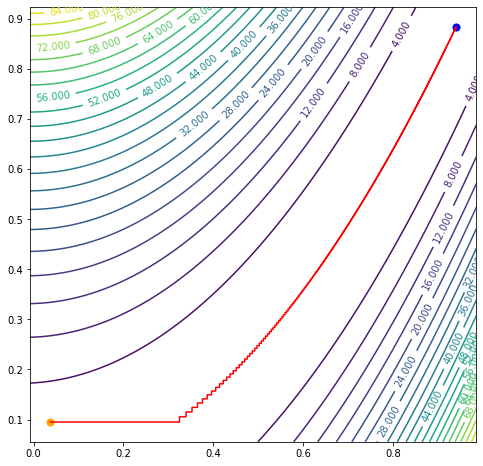

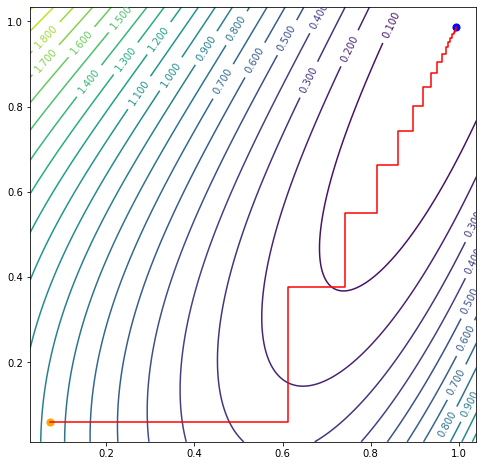

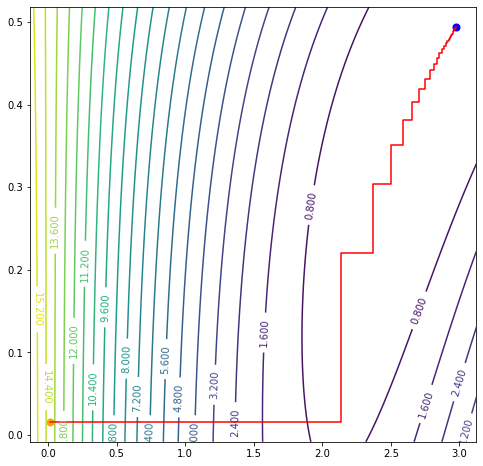

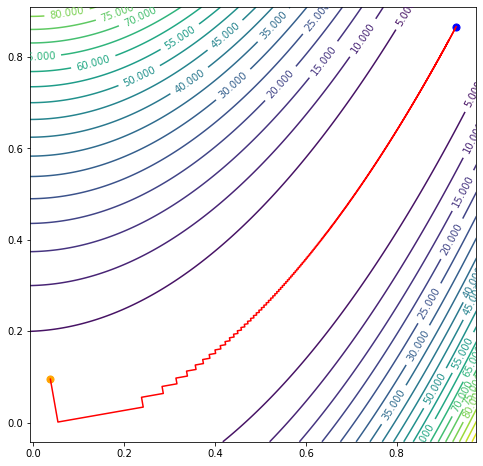

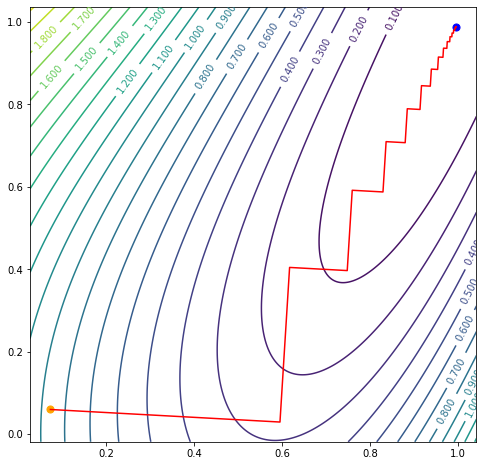

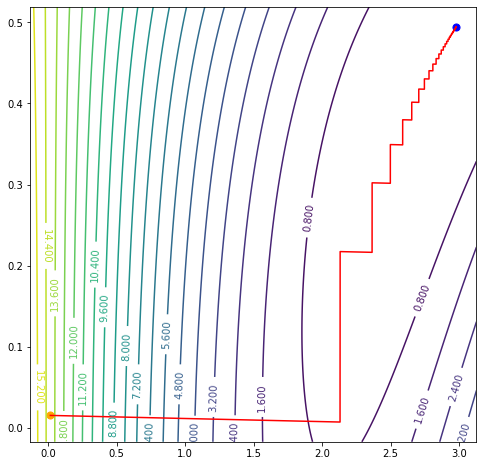

In [11]:

gradient_descents = {
    'coordinate': coordinate_descent,
    'steepest': steepest_descent,
}

for descent in gradient_descents:
    for equation in equations:
        f, df, X0 = equations[equation]
        coords, values = gradient_descents[descent](X0, f, df)
        print(f'{descent}, min of {equation} is {coords[-1]} with value {values[-1]}')
        if len(X0) == 2:
            risovalka(coords, f)


In [12]:

def projection_descent(X0, f, df, surface, D, eps=1e-5, max_iter=5e4):
    coords_real = []
    values_real = []
    coords_projected = []
    values_projected = []
    args_count = len(X0)
    k = 0

    best = 0
    F_best = np.float('inf')

    X = X0.copy()
    F = f(X)

    while k < max_iter:
        X_prev = X.copy()
        F_prev = F.copy()

        g = np.array([df(X, i) for i in range(args_count)])
        def f_next_X(a): return X - a * g
        alpha = golden_ratio(lambda a: f(f_next_X(a)), eps, 1, epsilon=eps)
        X = f_next_X(alpha)
        coords_real.append(X)
        values_real.append(f(X))

        if values_real[-1] < F_best:
            best = k
            F_best = f(X)

        coords = np.array([*X, f(X)])
        t = - (np.dot(coords, surface) + D) / np.sum(np.power(surface, 2))
        projected = surface * t + coords

        X = projected.copy()[:-1]
        F = projected.copy()[-1]

        coords_projected.append(projected[:-1])
        values_projected.append(projected[-1])
        k += 1

        if np.sum(np.abs(F - F_prev)) < eps:
            break

        if np.linalg.norm(X - X_prev) < eps:
            break


    return best, np.array(coords_real), np.array(values_real), np.array(coords_projected), np.array(values_projected)


<ipython-input-7-2def00606d04>:2: RuntimeWarning: overflow encountered in double_scalars
  return 100 * (X[1] - X[0] ** 2) ** 2 + (1 - X[0]) ** 2
<ipython-input-12-01fc8c0a8d3e>:32: RuntimeWarning: invalid value encountered in multiply
  projected = surface * t + coords
<ipython-input-12-01fc8c0a8d3e>:32: RuntimeWarning: invalid value encountered in add
  projected = surface * t + coords
C:\Users\leeel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\leeel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-10-2879f568b771>:25: UserWarning: No contour levels were found within the data range.
  cs = pylab.contour(xgrid, ygrid, zgrid, 21)
C:\Users\leeel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplot

projection, min of 100(x_2−x_1^2)^2+(1-x_1)^2 is 0 with value nan
projection, min of (x_2−x_1^2)^2+(1-x_1)^2 is 2 with value 0.10737094461427149
projection, min of (1.5-x_1*(1-x_2))^2+(2.25-x_1*(1-x_2^2))^2+(2.625-x_1*(1 -x_2^3))^2 is 13 with value nan


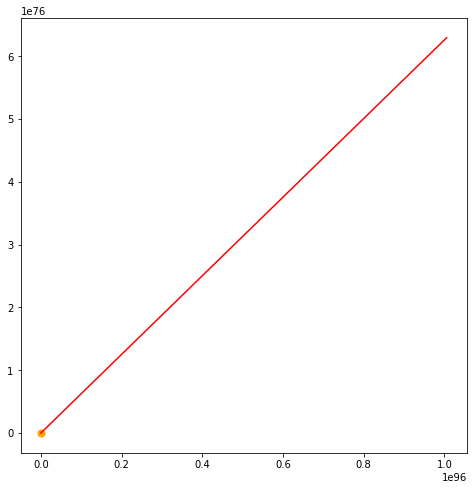

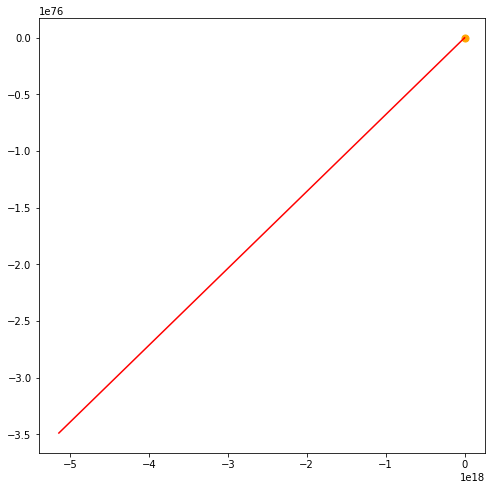

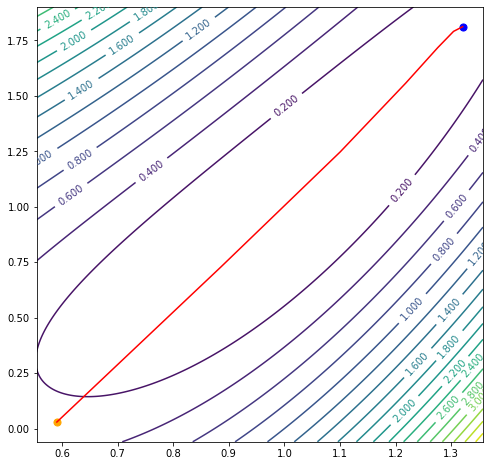

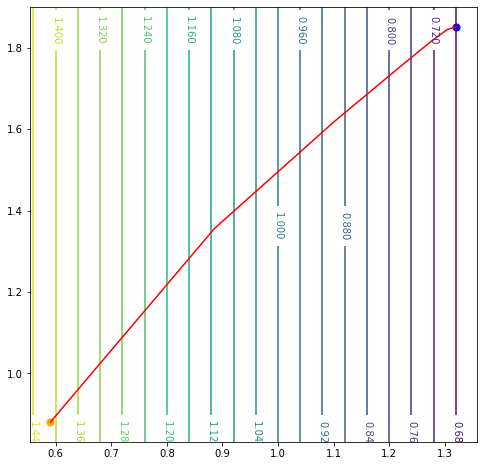

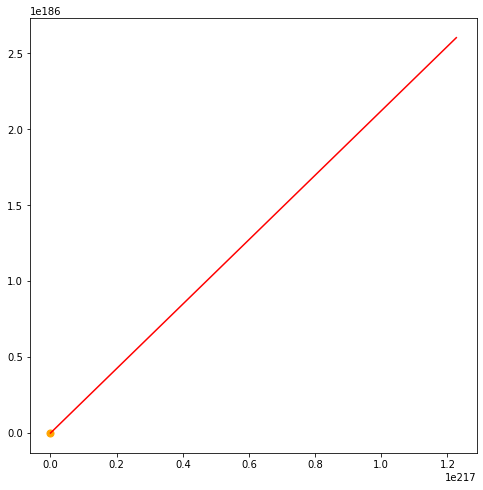

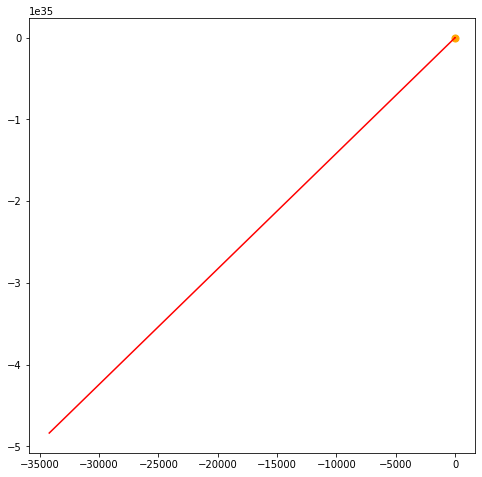

ValueError: shapes (5,) and (3,) not aligned: 5 (dim 0) != 3 (dim 0)

In [14]:

for equation in equations:
    f, df, X0 = equations[equation]
    best, coords_real, values_real, coords_projected, values_projected = projection_descent(X0, f, df, np.array([0, -1, -1]), 2, max_iter=1000, eps=1e-2)
    print(f'projection, min of {equation} is {best} with value {values_real[-1]}')

    if len(X0) == 2:
        risovalka(coords_real, f)
        risovalka(coords_projected, lambda X: -X[0] + 2)


In [15]:

def rieve_descent(X0, f, df, h=0.01, C=2.0, eps=1e-5, max_iter=5e4):
    sub_eps = 1e-3
    sub_max_iter = 100
    coords = []
    values = []
    k = 0

    v_prev = X0[0]
    v_cur = X0[1]
    x_prev, x_cur = steepest_descent(v_prev, f, df, eps=sub_eps, max_iter=sub_max_iter)[0][-1], steepest_descent(
        v_cur, f, df, eps=sub_eps, max_iter=sub_max_iter)[0][-1]

    while k < max_iter:
        coords.append(x_cur)
        values.append(f(x_cur))

        v_prev = v_cur.copy()
        v_cur = x_cur - (x_cur - x_prev) / np.linalg.norm(x_cur -
                                                          x_prev) * h * np.sign(f(x_cur) - f(x_prev))

        x_prev_prev = x_prev.copy()
        x_prev = x_cur.copy()
        x_cur = steepest_descent(
            v_cur, f, df, eps=sub_eps, max_iter=sub_max_iter)[0][-1]

        cos_a_cur = np.inner(v_cur-x_prev, x_cur-x_prev) / \
            np.linalg.norm(v_cur-x_prev) / np.linalg.norm(x_cur-x_prev)
        cos_a_prev = np.inner(v_prev-x_prev_prev, x_prev-x_prev_prev) / \
            np.linalg.norm(v_prev-x_prev_prev) / \
            np.linalg.norm(x_prev-x_prev_prev)

        h = h * C**(cos_a_cur - cos_a_prev)

        k += 1

        if np.linalg.norm(x_cur - x_prev) < eps or abs(f(x_cur) - f(x_prev)) < eps:
            break

    return np.array(coords), np.array(values)


<ipython-input-7-2def00606d04>:2: RuntimeWarning: overflow encountered in double_scalars
  return 100 * (X[1] - X[0] ** 2) ** 2 + (1 - X[0]) ** 2
<ipython-input-7-2def00606d04>:6: RuntimeWarning: overflow encountered in double_scalars
  lambda X: 2 * (200 * X[0] ** 3 - 200 * X[0] * X[1] + X[0] - 1),
<ipython-input-9-863286271aa3>:21: RuntimeWarning: invalid value encountered in double_scalars
  if np.sum(np.abs(values[-1] - values[-2])) < eps:
<ipython-input-7-2def00606d04>:6: RuntimeWarning: invalid value encountered in double_scalars
  lambda X: 2 * (200 * X[0] ** 3 - 200 * X[0] * X[1] + X[0] - 1),
C:\Users\leeel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\leeel\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-inp

rieve, min of 100(x_2−x_1^2)^2+(1-x_1)^2 is [nan nan] with value nan
rieve, min of (x_2−x_1^2)^2+(1-x_1)^2 is [1.00793244 1.01809935] with value 6.763921446788926e-05
rieve, min of (1.5-x_1*(1-x_2))^2+(2.25-x_1*(1-x_2^2))^2+(2.625-x_1*(1 -x_2^3))^2 is [2.98711771 0.49672387] with value 2.7041029906512583e-05
rieve, min of (x_1+x_2)^2+5(x_3−x_4)^2+(x_2−2x_3)^4+10(x_1−x_4)^4 is [-0.00130999  0.00305972  0.04473561  0.04508681] with value 0.00010577314331084733


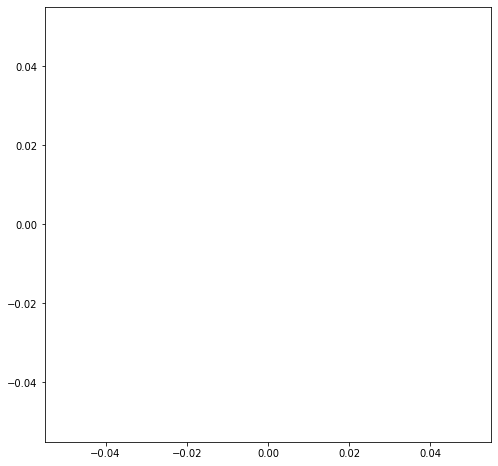

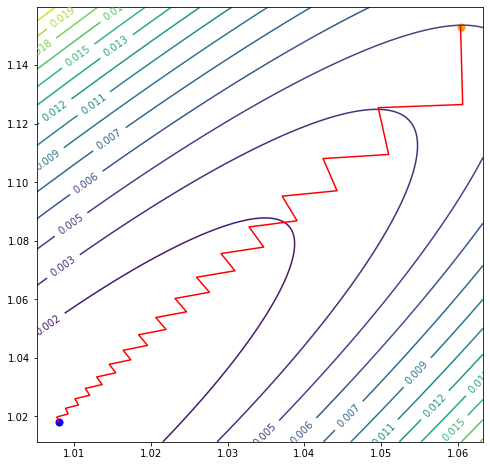

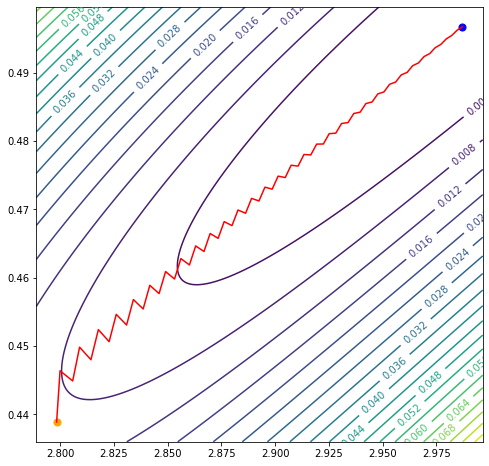

In [17]:

for equation in equations:
    f, df, X0 = equations[equation]
    coords, values = rieve_descent([np.ones(len(X0)) * 0.5, np.ones(len(X0)) * 2], f, df, h=0.001, C=2, max_iter=1000)
    print(f'rieve, min of {equation} is {coords[-1]} with value {values[-1]}')

    if len(X0) == 2:
        risovalka(coords, lambda X: f([X[0], X[1], 0, 0]))

